# Stroke Prediction Project


## About Project

The dataset used for this project is the Stroke Prediction Dataset, containing information about various attributes of individuals that could potentially influence their susceptibility to stroke. It includes data on gender, age, presence of hypertension, heart disease, marital status, type of work, residence type, average glucose level, body mass index (BMI), smoking status, and whether the individual has previously had a stroke. This dataset is valuable for stroke prediction as it captures diverse factors that contribute to stroke risk.

Attribute Information:

1. id: Unique identifier for each individual
2. gender: Gender of the individual (Male, Female, or Other)
3. age: Age of the individual
4. hypertension: Binary indicator (0 or 1) for hypertension (0 if the individual doesn't have hypertension, 1 if they do)
5. heart_disease: Binary indicator (0 or 1) for heart disease (0 if the individual doesn't have any heart diseases, 1 if they do)
6. ever_married: Marital status of the individual (No or Yes)
7. work_type: Type of work (children, Govt_job, Never_worked, Private, or Self-employed)
8. Residence_type: Type of residence (Rural or Urban)
9. avg_glucose_level: Average glucose level in blood
10. bmi: Body mass index (BMI)
11. smoking_status: Smoking status of the individual (formerly smoked, never smoked, smokes, or Unknown*)
12. stroke: Binary indicator (0 or 1) for stroke occurrence (1 if the individual had a stroke, 0 if not)

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data 

##  Pre-Processing and Exploratory Data Analysis (EDA)

### General information about data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns
from scipy.stats import zscore
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
import numpy.testing as testing
import matplotlib.colors as mcolors
import matplotlib.colors
from umap import UMAP
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.datasets import make_imbalance
from imblearn.under_sampling import (RandomUnderSampler, ClusterCentroids, TomekLinks, NeighbourhoodCleaningRule, EditedNearestNeighbours, NearMiss)
from imblearn.over_sampling import (SMOTE, ADASYN)
from sklearn.model_selection import train_test_split



from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import time

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

sns.set_style("white")
sns.set_palette("pastel")

In [2]:
# Read the data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')  
df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print("Count, mean, max, min and statistical data of numerical columns")
df.describe()

Count, mean, max, min and statistical data of numerical columns


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.select_dtypes(include=['object']).describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
print("gender: " ,df['gender'].unique())
print("ever_married: " ,df['ever_married'].unique())
print("work_type: " ,df['work_type'].unique())
print("Residence_type: " ,df['Residence_type'].unique())
print("smoking_status: " ,df['smoking_status'].unique())

gender:  ['Male' 'Female' 'Other']
ever_married:  ['Yes' 'No']
work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type:  ['Urban' 'Rural']
smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
df["gender"].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

There is Other gender. Let is replace that with female

gender
Female    2995
Male      2115
Name: count, dtype: int64


<Axes: ylabel='count'>

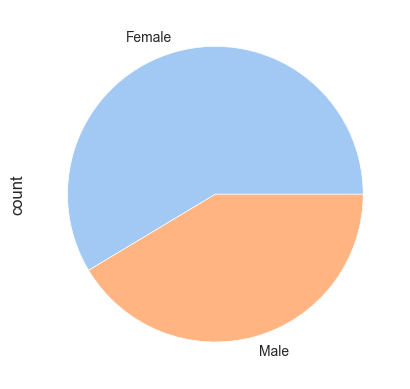

In [9]:
df["gender"] = df["gender"].replace("Other", "Female")


print(df["gender"].value_counts())

df["gender"].value_counts().plot(kind = "pie")

In [10]:
df["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [11]:
duplicate_rows = df[df.duplicated()]

# printing the duplicate rows
print("Duplicate rows based on all columns are :")
print(duplicate_rows)

Duplicate rows based on all columns are :
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [12]:
print("Null values:\n",df.isnull().sum()/len(df)*100)


Null values:
 id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


1. Data from bmi feature is missing. 
2. Both Categorical and numerical features are present.
    * Categorical Features: gender, ever_married, work_type, Residence_type, smoking_status
    * Binary Numerical Features: hypertension,heart_disease, stroke
    * Continous Numerical Features: age, avg_glucose_level, bmi

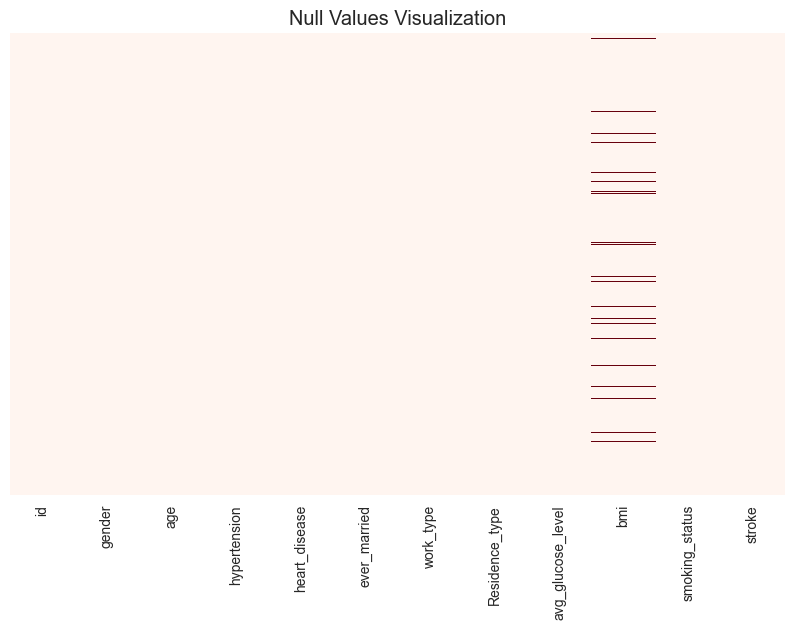

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Reds', cbar=False, yticklabels=False)
plt.title('Null Values Visualization')
plt.show()


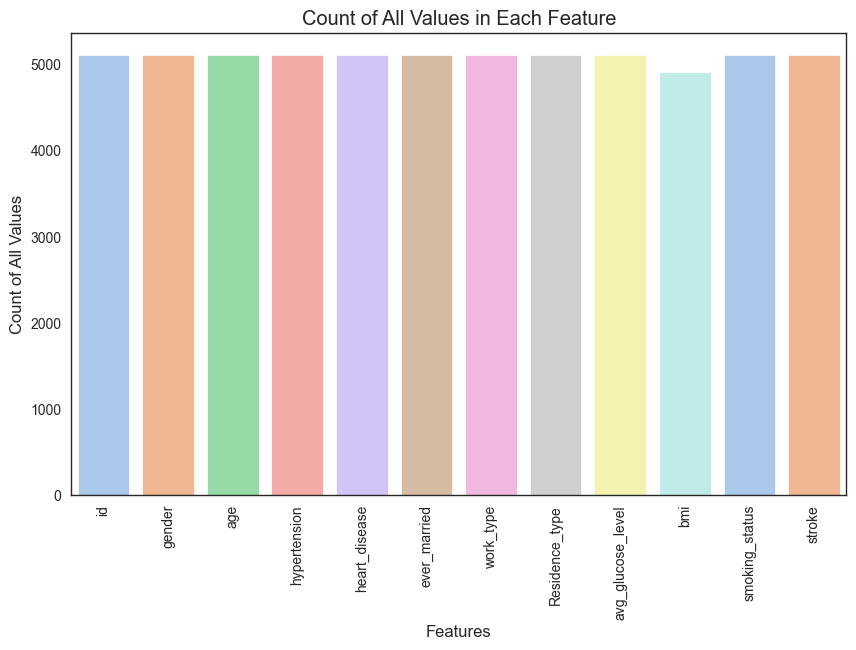

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns, y=df.count(), hue=df.columns, palette='pastel', legend=False)
plt.title('Count of All Values in Each Feature')
plt.xlabel('Features')
plt.ylabel('Count of All Values')
plt.xticks(rotation=90)
plt.show()

In [15]:
# handling missing values
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Only bmi feature have some missing data,which was be filled with the median of the bmi

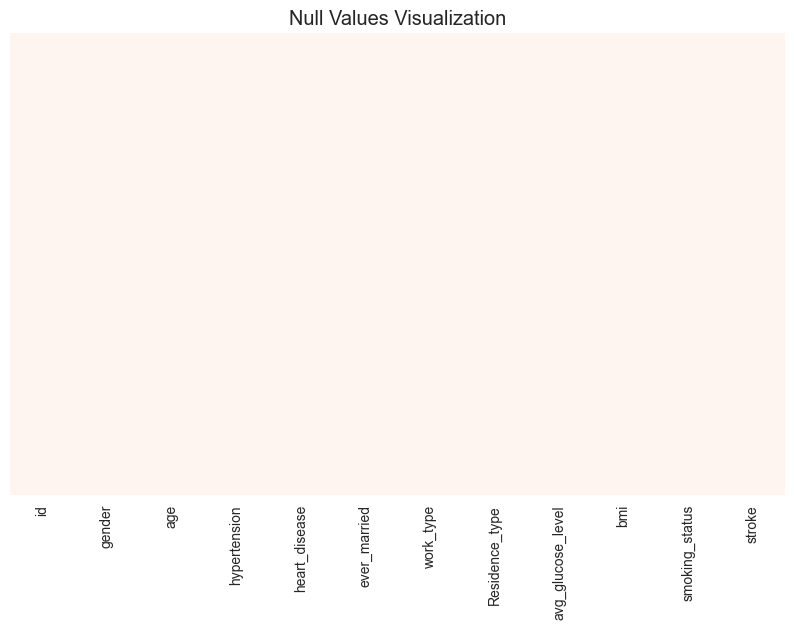

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='Reds', cbar=False, yticklabels=False)
plt.title('Null Values Visualization')
plt.show()

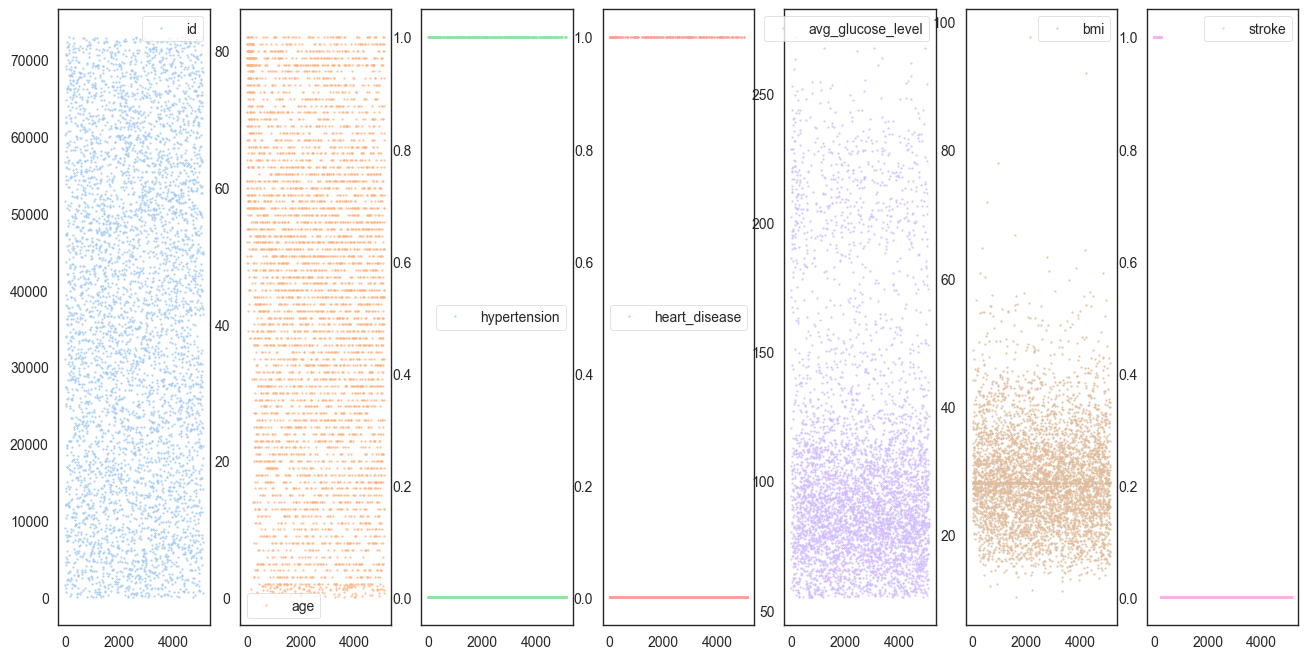

In [17]:
df.plot(lw=0, marker=".", subplots=True, layout=(1, 7), figsize=(16, 8), markersize=1);


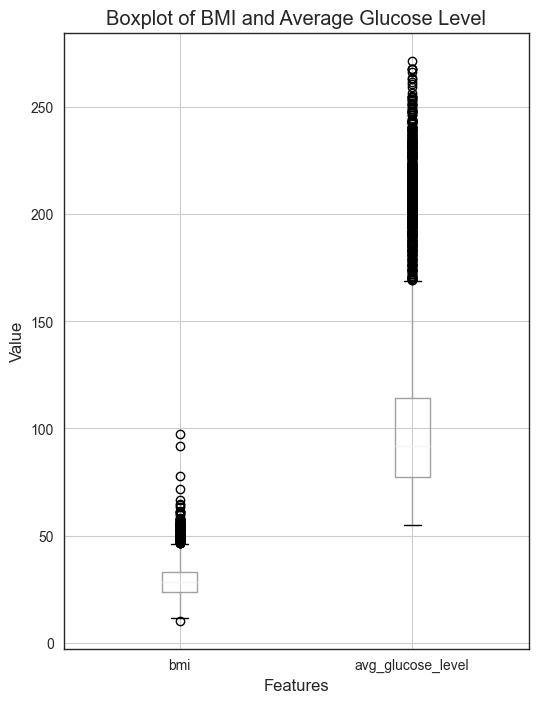

In [18]:
plt.figure(figsize=(6, 8))
df.boxplot(column=['bmi', 'avg_glucose_level'])
plt.title('Boxplot of BMI and Average Glucose Level')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

In [19]:
def out_iqr(data , column):
    global lower , upper
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1

    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    
    # calculate the lower and upper bound value
    lower, upper = q1 - cut_off, q3 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    
    print('Total number of outliers are', df1.shape[0]+ df2.shape[0])
    
    mask = (df[column] >= lower) & (df[column] <= upper)
    
    return data[mask]

I replaced the outliers with values between 1.5 times their lower and upper quartiles

**Inter quantile:** $75^{th}~quantile-25^{th}~quantile$

**upper boundary:** $75^{th}~quantile + (IQR * 1.5)$

**lower boundary:** $25^{th}~quantile – (IQR * 1.5)$

So, the outlier will sit outside these boundaries.

In [20]:
df = out_iqr(df , 'avg_glucose_level')

The IQR is 36.845
The lower bound value is 21.977500000000006
The upper bound value is 169.35750000000002
Total number of outliers are 627


In [21]:
df = out_iqr(df , 'bmi')

The IQR is 8.900000000000002
The lower bound value is 9.949999999999998
The upper bound value is 45.550000000000004
Total number of outliers are 100


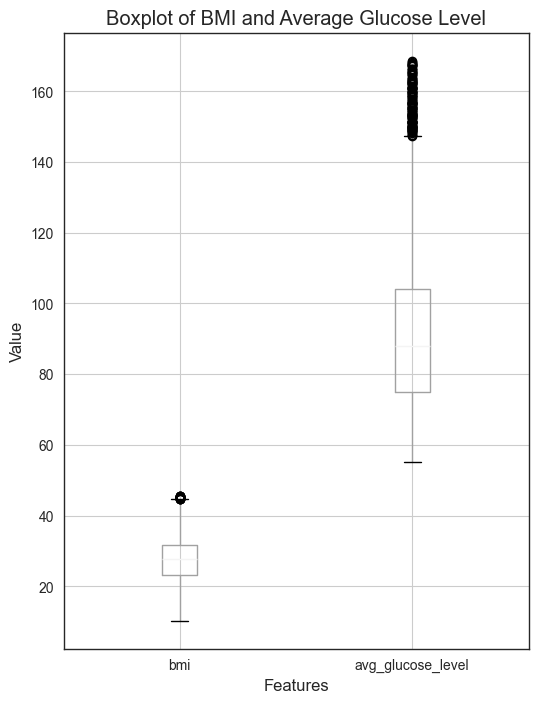

In [22]:
plt.figure(figsize=(6, 8))
df.boxplot(column=['bmi', 'avg_glucose_level'])
plt.title('Boxplot of BMI and Average Glucose Level')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

In [23]:
# Binning of numerical variables
df.loc[:, 'bmi_cut'] = pd.cut(df['bmi'], bins=[0, 19, 25, 30, 10000], labels=['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df.loc[:, 'age_cut'] = pd.cut(df['age'], bins=[0, 13, 18, 45, 60, 200], labels=['Children', 'Teens', 'Adults', 'Mid Adults', 'Elderly'])
df.loc[:, 'glucose_cut'] = pd.cut(df['avg_glucose_level'], bins=[0, 90, 160, 230, 500], labels=['Low', 'Normal', 'High', 'Very High'])


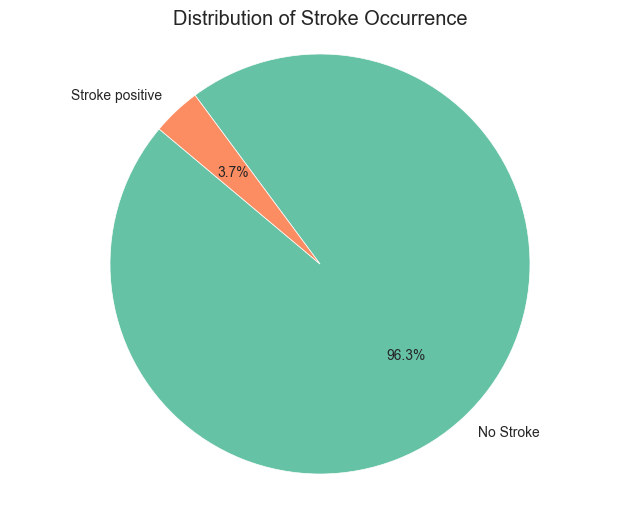

In [24]:
# Counting the occurrences of individuals with and without stroke
stroke_counts = df['stroke'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke positive'], autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)
plt.title('Distribution of Stroke Occurrence')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Showing the plot
plt.show()

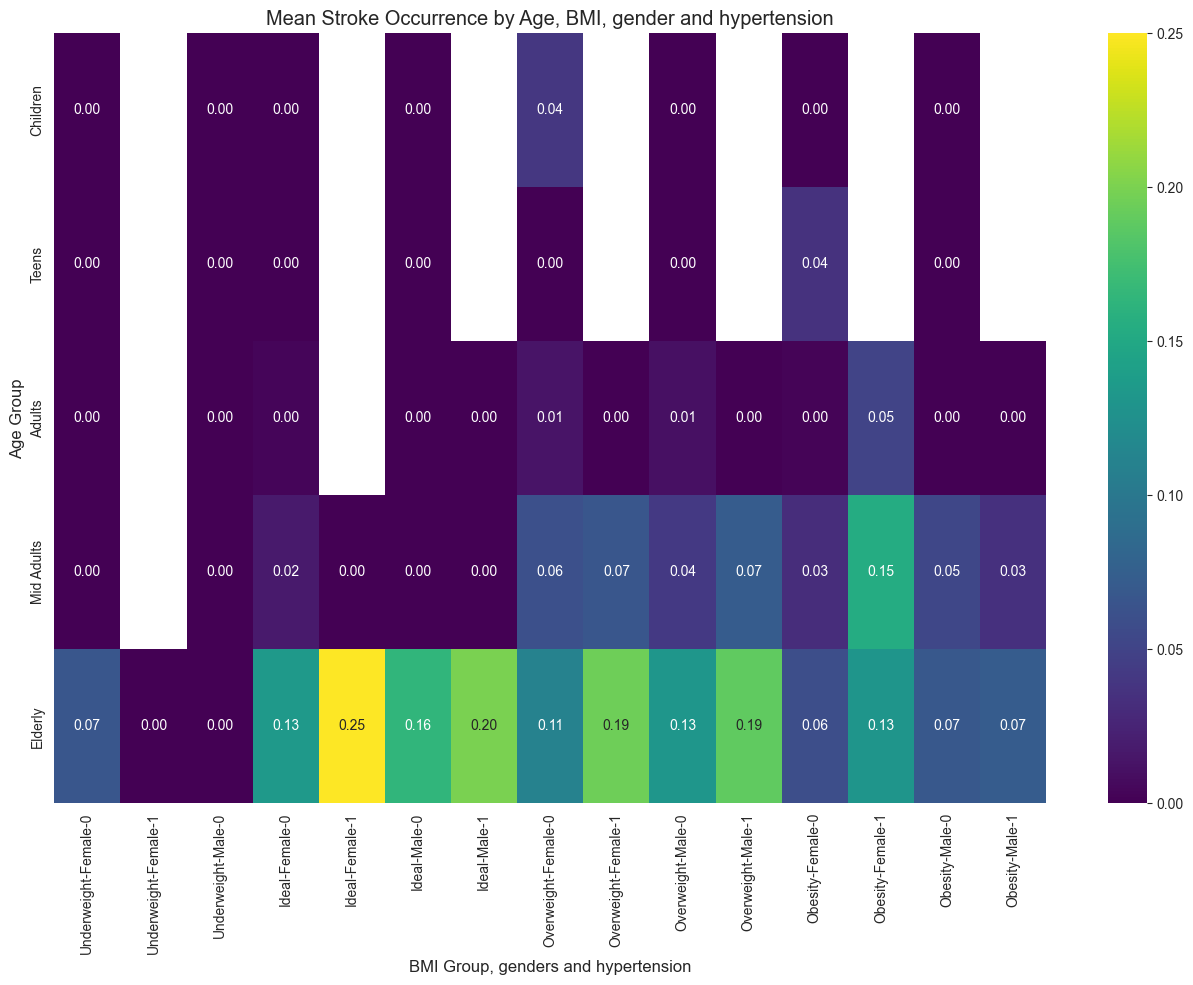

In [25]:
pivot_table = df.pivot_table(index='age_cut', columns=['bmi_cut', 'gender', 'hypertension'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('BMI Group, genders and hypertension')
plt.ylabel('Age Group')
plt.title('Mean Stroke Occurrence by Age, BMI, gender and hypertension')

# Showing the plot
plt.show()

We can observe that elderly women with hypertension and ideal weight mostly suffered from a stroke. Let's take a closer look.

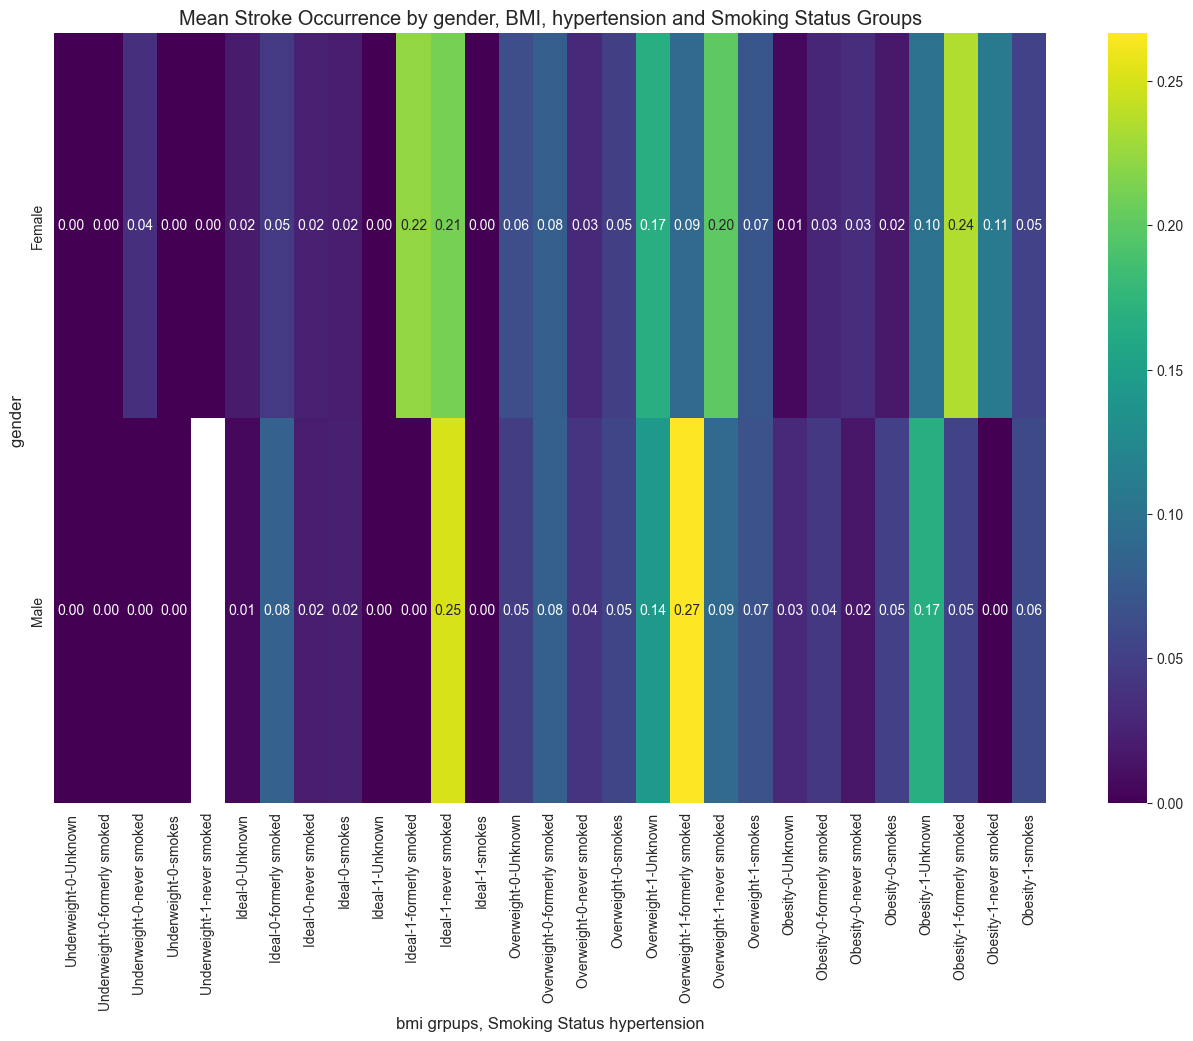

In [26]:
pivot_table = df.pivot_table(index='gender', columns=['bmi_cut', 'hypertension', 'smoking_status'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('bmi grpups, Smoking Status hypertension')
plt.ylabel('gender ')
plt.title('Mean Stroke Occurrence by gender, BMI, hypertension and Smoking Status Groups')

# Showing the plot
plt.show()

Here, we observe various relationships. If women and men with ideal weight have hypertension, their likelihood of having a stroke is higher. However, the rate is also high for women who smoked previously. In women and men with average weight or above, having hypertension directly affects the likelihood of a stroke.

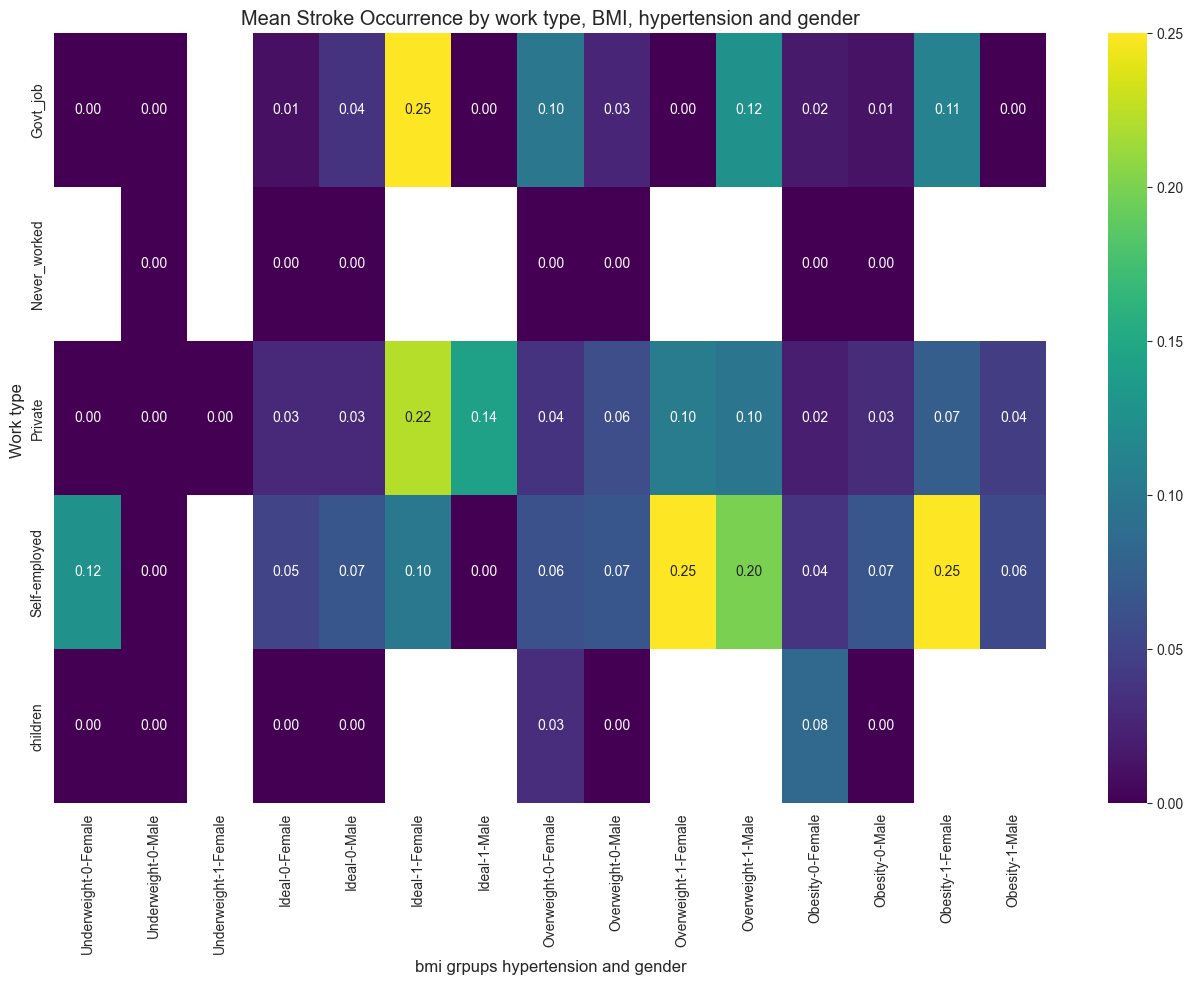

In [27]:
pivot_table = df.pivot_table(index='work_type', columns=['bmi_cut', 'hypertension', 'gender'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('bmi grpups hypertension and gender')
plt.ylabel('Work type ')
plt.title('Mean Stroke Occurrence by work type, BMI, hypertension and gender')

# Showing the plot
plt.show()

In general, we can observe that women with hypertension are more likely to have a stroke.

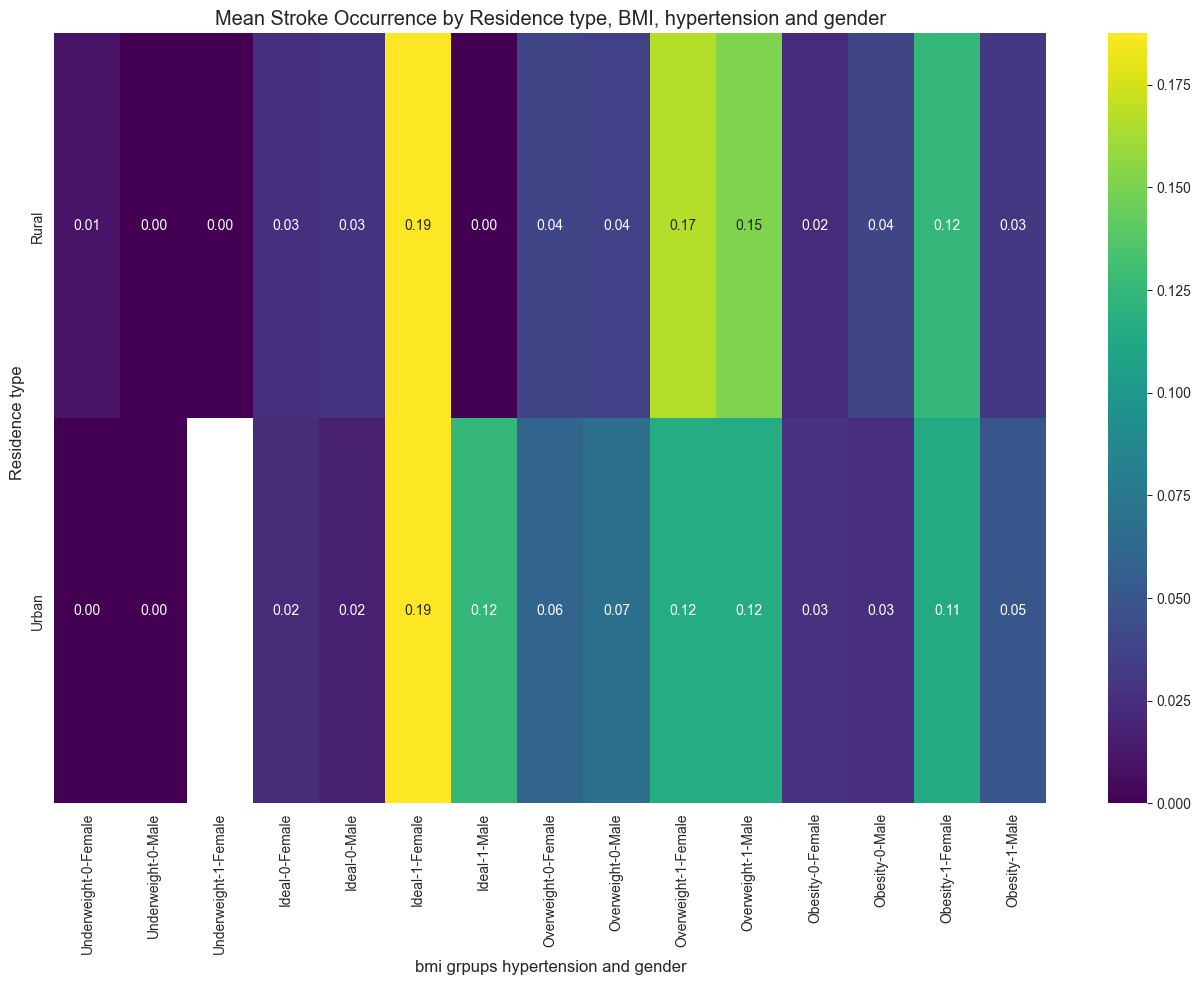

In [28]:
pivot_table = df.pivot_table(index='Residence_type', columns=['bmi_cut', 'hypertension', 'gender'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('bmi grpups hypertension and gender')
plt.ylabel('Residence type  ')
plt.title('Mean Stroke Occurrence by Residence type, BMI, hypertension and gender')

# Showing the plot
plt.show()

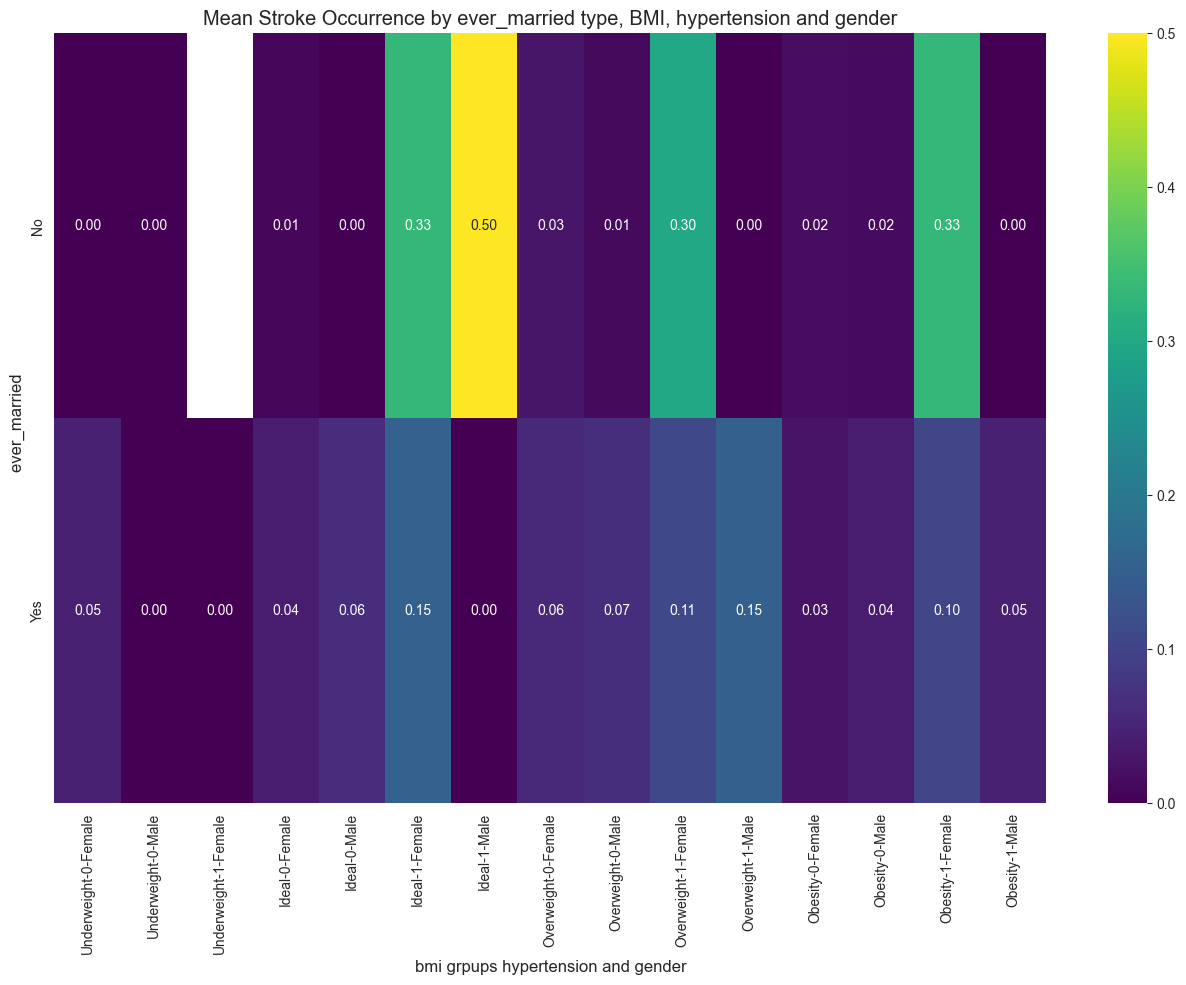

In [29]:
pivot_table = df.pivot_table(index='ever_married', columns=['bmi_cut', 'hypertension', 'gender'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('bmi grpups hypertension and gender')
plt.ylabel('ever_married  ')
plt.title('Mean Stroke Occurrence by ever_married type, BMI, hypertension and gender')

# Showing the plot
plt.show()

However, things change a bit here. We observe that unmarried men with hypertension may be more likely to have a stroke.

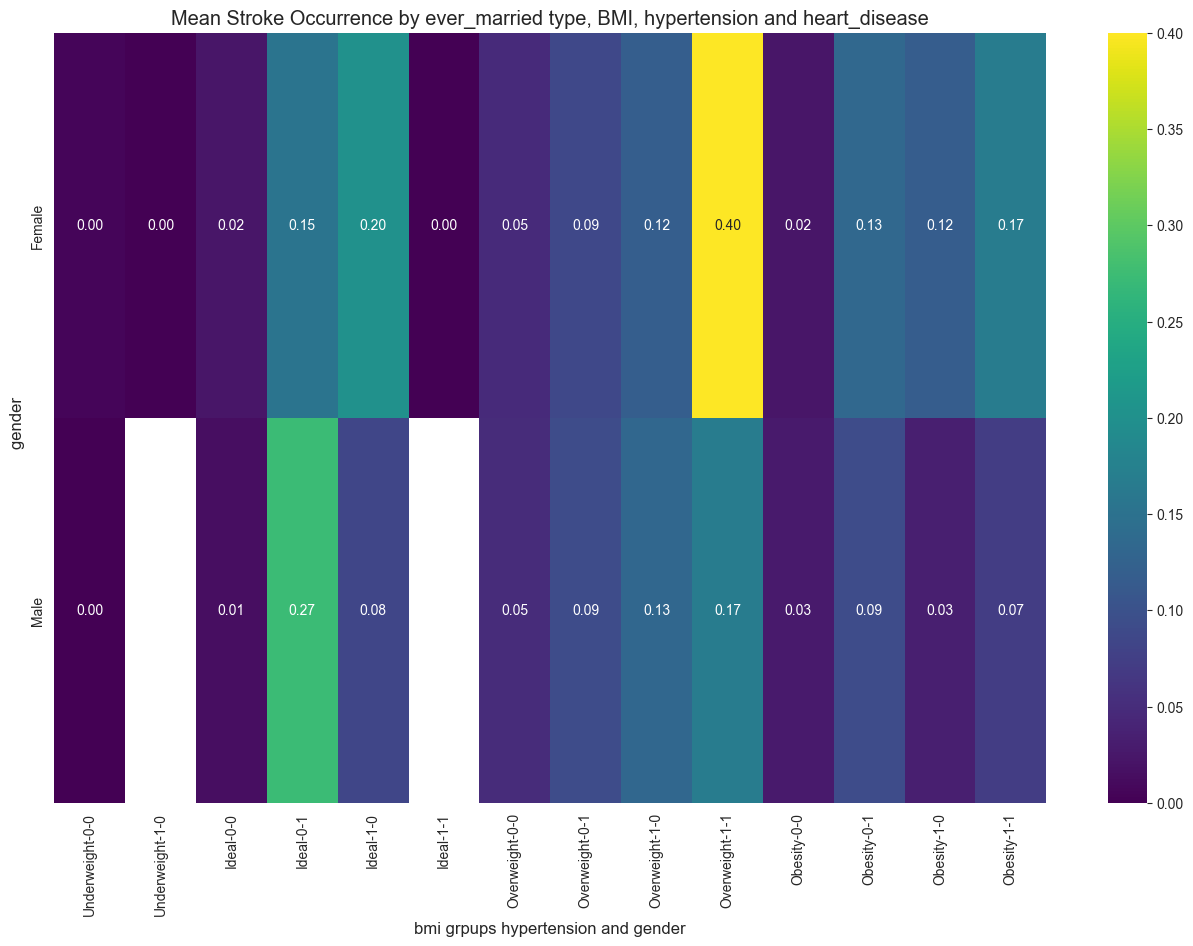

In [30]:
pivot_table = df.pivot_table(index='gender', columns=['bmi_cut', 'hypertension', 'heart_disease'], values='stroke', aggfunc='mean', observed=False)

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f", cbar=True)

# Setting labels and title
plt.xlabel('bmi grpups hypertension and gender')
plt.ylabel('gender  ')
plt.title('Mean Stroke Occurrence by ever_married type, BMI, hypertension and heart_disease')

# Showing the plot
plt.show()

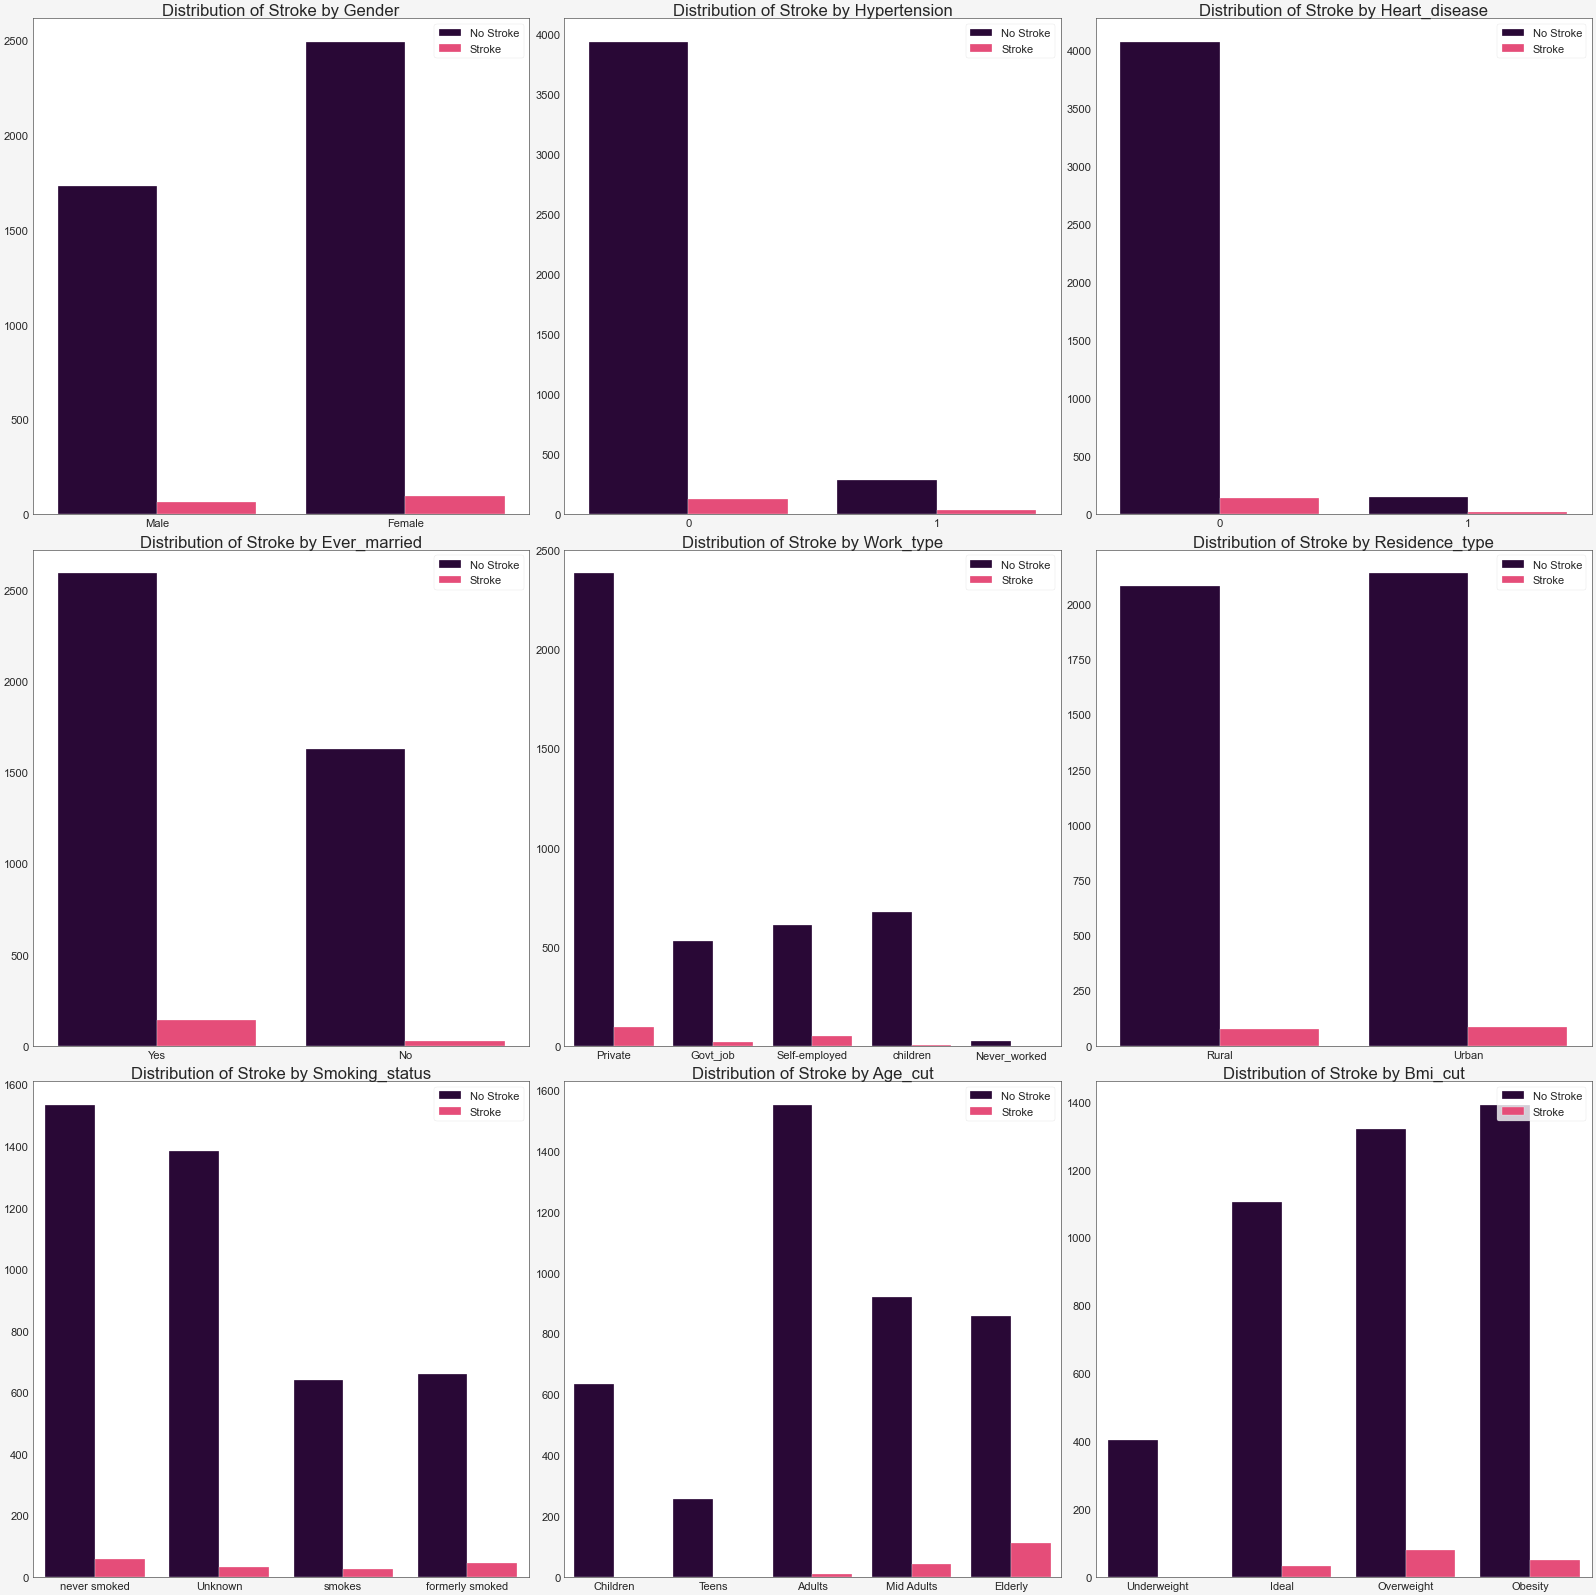

In [31]:
fig, axes = plt.subplots(3, 3, figsize=(40, 40), dpi=40)
fig.patch.set_facecolor('#f5f5f5')

columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_cut', 'bmi_cut']

for ax, column in zip(axes.ravel(), columns):
    sns.countplot(data=df, x=column, hue='stroke', ax=ax, palette={0: '#2c003e', 1: '#fe346e'})
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Distribution of Stroke by {column.capitalize()}', fontsize=30)
    ax.legend(['No Stroke', 'Stroke'], loc='upper right', fontsize=20)

# Increase the size of tick labels
for ax in axes.ravel():
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

plt.tight_layout()
plt.show()


## More details (correlations) between continuous variables

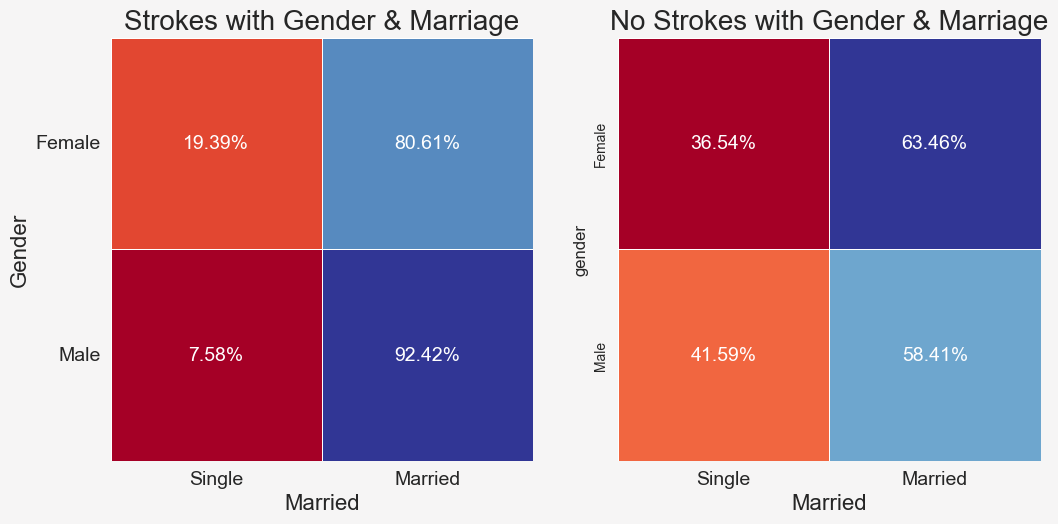

In [32]:
stroke = pd.crosstab(df[df['stroke']==1]['gender'], df[df['stroke']==1]['ever_married'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['gender'], df[df['stroke']==0]['ever_married'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":14})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":14})

# Set titles and labels
ax0.set_title('Strokes with Gender & Marriage', fontsize=20)
ax0.set_xlabel('Married', fontsize=16)
ax0.set_ylabel('Gender', fontsize=16)
ax0.set_xticklabels(['Single', 'Married'], fontsize=14)
ax0.set_yticklabels(['Female', 'Male'], fontsize=14, rotation=0)

ax1.set_title('No Strokes with Gender & Marriage', fontsize=20)
ax1.set_xlabel('Married', fontsize=16)
ax1.set_xticklabels(['Single', 'Married'], fontsize=14)

# Show the plot
plt.show()


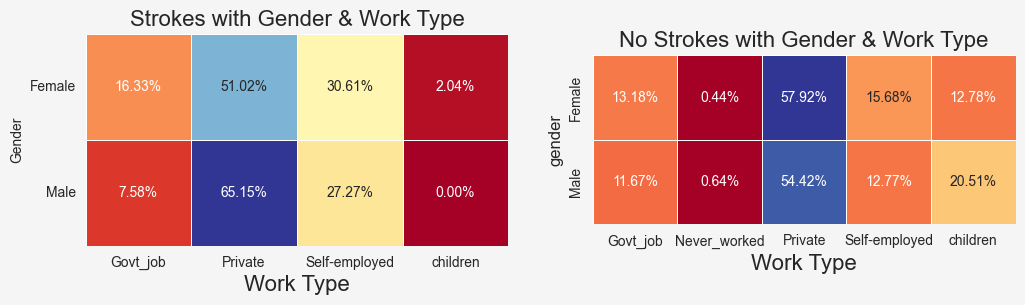

In [33]:
stroke = pd.crosstab(df[df['stroke']==1]['gender'], df[df['stroke']==1]['work_type'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['gender'], df[df['stroke']==0]['work_type'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})

# Set titles and labels
ax0.set_title('Strokes with Gender & Work Type', fontsize=16)
ax0.set_xlabel('Work Type', fontsize=16)
ax0.set_ylabel('Gender', fontsize=10)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10, rotation=0)

ax1.set_title('No Strokes with Gender & Work Type', fontsize=16)
ax1.set_xlabel('Work Type', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)

# Show the plot
plt.show()

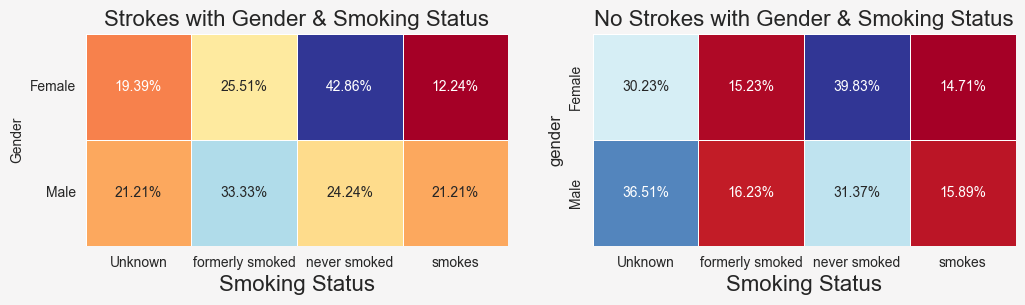

In [34]:
stroke = pd.crosstab(df[df['stroke']==1]['gender'], df[df['stroke']==1]['smoking_status'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['gender'], df[df['stroke']==0]['smoking_status'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})

# Set titles and labels
ax0.set_title('Strokes with Gender & Smoking Status', fontsize=16)
ax0.set_xlabel('Smoking Status', fontsize=16)
ax0.set_ylabel('Gender', fontsize=10)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10, rotation=0)

ax1.set_title('No Strokes with Gender & Smoking Status', fontsize=16)
ax1.set_xlabel('Smoking Status', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)

# Show the plot
plt.show()


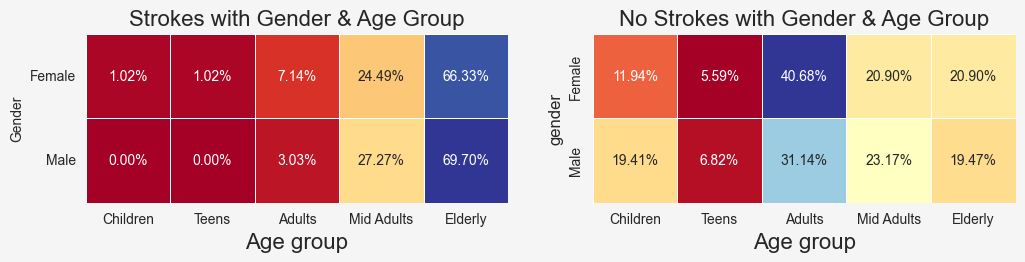

In [35]:
stroke = pd.crosstab(df[df['stroke']==1]['gender'], df[df['stroke']==1]['age_cut'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['gender'], df[df['stroke']==0]['age_cut'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})

# Set titles and labels
ax0.set_title('Strokes with Gender & Age Group', fontsize=16)
ax0.set_xlabel('Age group', fontsize=16)
ax0.set_ylabel('Gender', fontsize=10)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10, rotation=0)

ax1.set_title('No Strokes with Gender & Age Group', fontsize=16)
ax1.set_xlabel('Age group', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)

# Show the plot
plt.show()


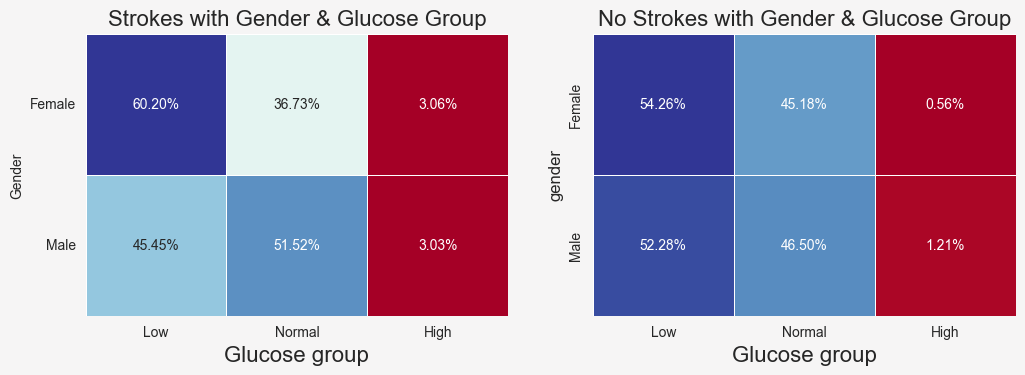

In [36]:
stroke = pd.crosstab(df[df['stroke']==1]['gender'], df[df['stroke']==1]['glucose_cut'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['gender'], df[df['stroke']==0]['glucose_cut'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})

# Set titles and labels
ax0.set_title('Strokes with Gender & Glucose Group', fontsize=16)
ax0.set_xlabel('Glucose group', fontsize=16)
ax0.set_ylabel('Gender', fontsize=10)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10, rotation=0)

ax1.set_title('No Strokes with Gender & Glucose Group', fontsize=16)
ax1.set_xlabel('Glucose group', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)

# Show the plot
plt.show()


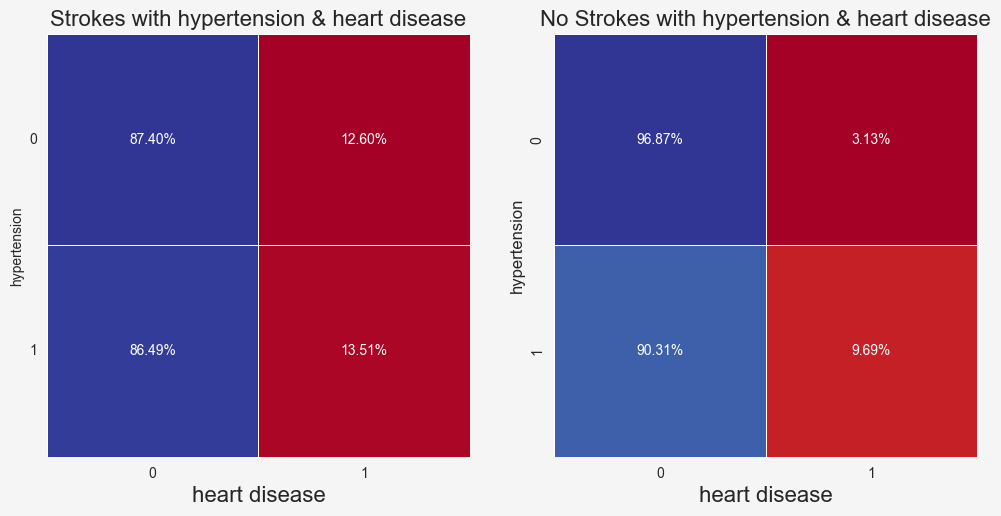

In [37]:
stroke = pd.crosstab(df[df['stroke']==1]['hypertension'], df[df['stroke']==1]['heart_disease'], normalize='index')
no_stroke = pd.crosstab(df[df['stroke']==0]['hypertension'], df[df['stroke']==0]['heart_disease'], normalize='index')

# Create the figure and subplots
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6), dpi=100)

# Set background color
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

# Plot the heatmaps
sns.heatmap(ax=ax0, data=stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})
sns.heatmap(ax=ax1, data=no_stroke, linewidths=0.5, square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap='RdYlBu', annot=True, fmt=".2%", annot_kws={"fontsize":10})

# Set titles and labels
ax0.set_title('Strokes with hypertension & heart disease', fontsize=16)
ax0.set_xlabel('heart disease', fontsize=16)
ax0.set_ylabel('hypertension', fontsize=10)
ax0.set_xticklabels(ax0.get_xticklabels(), fontsize=10)
ax0.set_yticklabels(ax0.get_yticklabels(), fontsize=10, rotation=0)

ax1.set_title('No Strokes with hypertension & heart disease', fontsize=16)
ax1.set_xlabel('heart disease', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=10)

# Show the plot
plt.show()


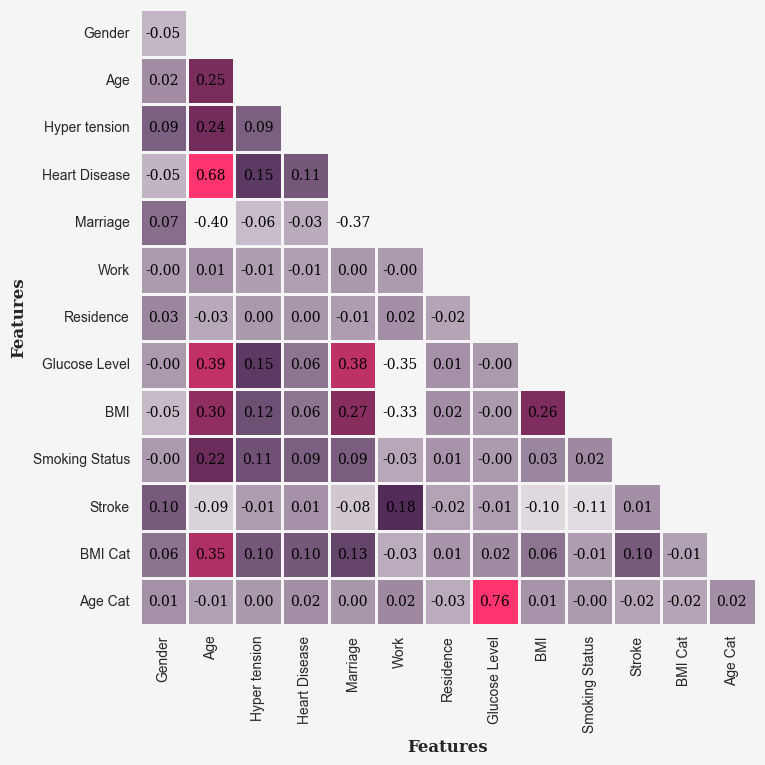

In [38]:
df_copy = df.copy()

# Feature log transformations 
df_copy['age'] = df_copy['age'].apply(lambda x: np.log(x + 10) * 3)
df_copy['avg_glucose_level'] = df_copy['avg_glucose_level'].apply(lambda x: np.log(x + 10) * 2)
df_copy['bmi'] = df_copy['bmi'].apply(lambda x: np.log(x + 10) * 2)

# Preprocessing - label encoding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

# Label encoding of ordinal categorical features
for col in df_copy.columns:
    df_copy[col] = le.fit_transform(df_copy[col])

cols = df_copy.columns

# Normalizing with StandardScaler of numerical features
df_copy[cols] = ss.fit_transform(df_copy[cols])

# Correlation map for all the features
df_corr = df_copy.drop(columns=['id']).corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))

fig, ax = plt.subplots(figsize=(8, 8))
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()

colors = ['#f6f5f5', '#512b58', '#fe346e']
colormap = mcolors.LinearSegmentedColormap.from_list("", colors)

# Plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=colormap,
            vmin=-0.15, vmax=0.5, cbar_kws={"shrink": .5}, ax=ax, cbar=False,
            linewidth=1, linecolor='#f6f5f5', square=True,
            annot_kws={'font': 'serif', 'size': 10, 'color': 'black'})

# Yticks
ax.tick_params(axis='y', rotation=0)
xticks = ['Gender', 'Age', 'Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status', 'Stroke', 'BMI Cat', 'Age Cat']
yticks = ['Gender', 'Age', 'Hyper tension', 'Heart Disease', 'Marriage', 'Work', 'Residence', 'Glucose Level', 'BMI', 'Smoking Status', 'Stroke', 'BMI Cat', 'Age Cat']
ax.set_xticklabels(xticks, rotation=90, fontsize=10)
ax.set_yticklabels(yticks, fontsize=10)

# Set label properties
ax.set_xlabel('Features', fontdict={'font': 'serif', 'size': 12, 'weight': 'bold'})
ax.set_ylabel('Features', fontdict={'font': 'serif', 'size': 12, 'weight': 'bold'})


plt.show()


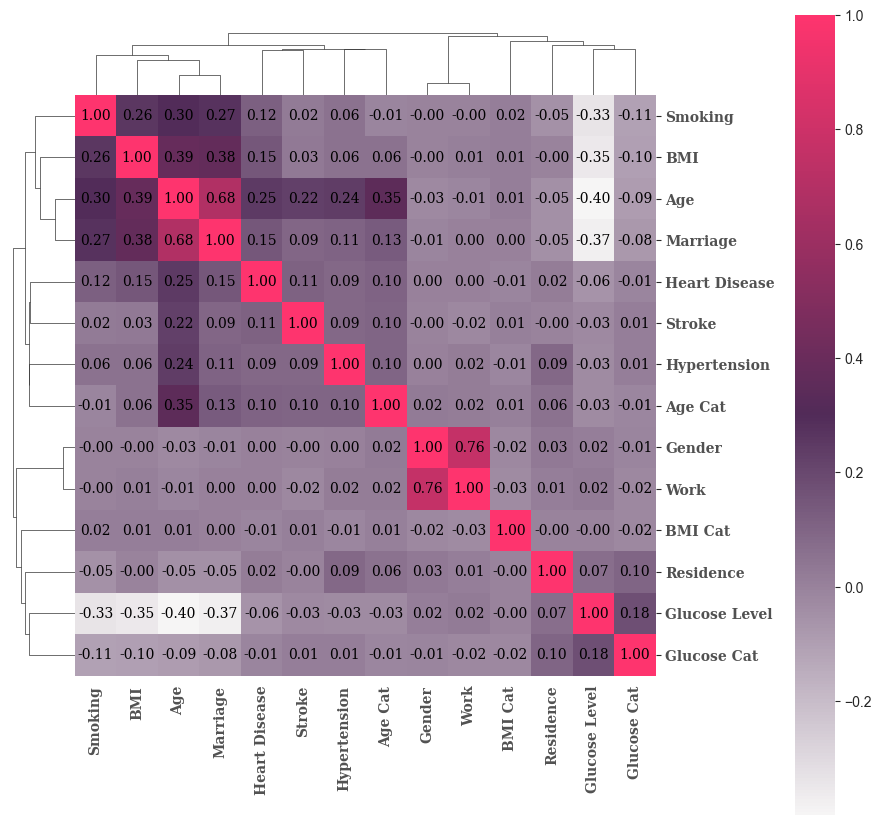

In [39]:
labels = ['Smoking', 'BMI','Age', 'Marriage', 'Heart Disease', 'Stroke','Hypertension', 'Age Cat', 'Gender', 'Work', 'BMI Cat', 'Residence','Glucose Level', 'Glucose Cat' ]

g = sns.clustermap(df_corr, annot=True, fmt='0.2f',
                   cbar=True, cbar_pos=(1, 0, 0.05, 1), linewidth=0,
                   cmap=colormap, dendrogram_ratio=0.1,
                   facecolor='#f6f5f5', figsize=(8, 8), square=False,
                   annot_kws={'font': 'serif', 'size': 10, 'color': 'black'})

label_args = {'font': 'serif', 'font': 18, 'weight': 'bold'}
plt.setp(g.ax_heatmap.set_yticklabels(labels), rotation=0, fontsize=10, fontfamily='Serif', fontweight='bold', alpha=0.8)  # For y axis
plt.setp(g.ax_heatmap.set_xticklabels(labels), rotation=90, fontsize=10, fontfamily='Serif', fontweight='bold', alpha=0.8)  # For x axis
plt.show()


### ML Model Selection

In [40]:
df_copy = df.copy()
# feature log transformations 

df['age'] = df['age'].apply(lambda x: np.log(x+10)*3)
df['avg_glucose_level'] = df['avg_glucose_level'].apply(lambda x: np.log(x+10)*2)
df['bmi'] = df['bmi'].apply(lambda x: np.log(x+10)*2)



# preprocessing - label enconding and numerical value scaling
ohe = OneHotEncoder()
ss = StandardScaler()
le = LabelEncoder()

X = df.drop(['stroke','id'], axis = 1)
y = df['stroke']

ordinal = ['age_cut',  'glucose_cut', 'bmi_cut','hypertension', 'heart_disease'] # label enconding
nominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level'] 

## label encoding of ordinal categorical features
for col in ordinal:
    X[col] = le.fit_transform(X[col])
    
## normalizing with standard scaler of numerical features
X[numerical] = ss.fit_transform(X[numerical])

## norminal data one hot encoding for categorical features
temp = X.drop(columns = nominal)
dummies = pd.get_dummies(X[nominal])
X = pd.concat([temp,dummies], axis = 1)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


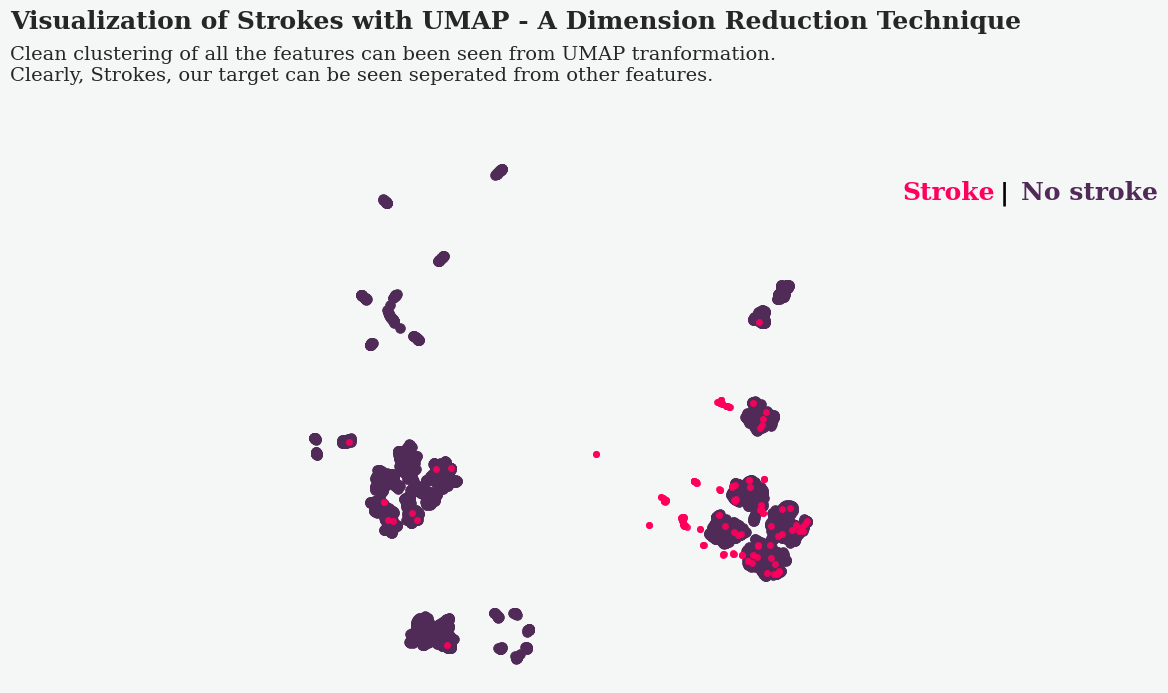

In [41]:
umap = UMAP(random_state=2024)
stroke_umap = umap.fit_transform(X, y)



fig = plt.figure(figsize=(7,7))# # create figure
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0.4, hspace=0.5)
ax0 = fig.add_subplot(gs[0, 0])


# Change background color
background_color = "#f5f6f6"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color)


ax0.scatter(stroke_umap[df['stroke'] == 0][:,0], stroke_umap[df['stroke'] == 0][:,1], c='#512b58', alpha=1,s=50)
ax0.scatter(stroke_umap[df['stroke'] == 1][:,0], stroke_umap[df['stroke'] == 1][:,1], c='#ff005c', alpha=0.9,s=20)


ax0.text(-25, 24, 'Clean clustering of all the features can been seen from UMAP tranformation. \nClearly, Strokes, our target can be seen seperated from other features.',fontsize=14, fontfamily='serif')

ax0.text(-25, 27, 'Visualization of Strokes with UMAP - A Dimension Reduction Technique', 
        fontsize=18, fontweight='bold', fontfamily='serif')


for s in ["top","right","left","bottom"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_xticks([])
ax0.set_yticks([])

fig.text(1,0.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#ff005c')
fig.text(1.14,0.8,"|", fontweight="bold", fontfamily='serif', fontsize=18, color='black')
fig.text(1.17,0.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=18, color='#512b58')

plt.show()

In [42]:

class sampling():
    
    def __init__(self,feat,tar,method,ax): 
        self.feat = feat
        self.tar = tar
        self.method = method
        self.ax = ax
    
        
    # under sampling visualization

    def visualize_data(self):
        
        temp_y = pd.DataFrame({'y':self.tar})
        
        # dimension reduction
        pca = PCA(n_components= 2).fit_transform(self.feat)
        
        self.ax.set_facecolor('#f5f6f6')
        # plotting4
        self.ax.scatter(pca[temp_y['y'] == 0][:,0], pca[temp_y['y'] == 0][:,1], c = '#512b58', s = 10)
        self.ax.scatter(pca[temp_y['y'] == 1][:,0], pca[temp_y['y'] == 1][:,1], c = '#ff005c', s =10)
        
        for loc in ['left','right','top', 'bottom']:
            self.ax.spines[loc].set_visible(False)
        self.ax.axes.get_xaxis().set_visible(False)
        self.ax.axes.get_yaxis().set_visible(False)
        self.ax.set_xticklabels('')
        self.ax.set_yticklabels('')
        self.ax.set_xlim(xmin = -6, xmax = 6)
        self.ax.set_ylim(ymin = -5, ymax = 6)

    
        self.ax.text(1.6,3.8,"Stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#ff005c')
        self.ax.text(3.2,3.8,"|", fontweight="bold", fontfamily='serif', fontsize=13, color='black')
        self.ax.text(3.4,3.8,"No stroke", fontweight="bold", fontfamily='serif', fontsize=13, color='#512b58')
        self.ax.text(-6,5.5,self.method, {'font': 'serif', 'weight': 'bold', 'size': 20}, alpha = 0.8)
        self.ax.text(-6,4.5,'{} contain {} number of datapoint, \nand targets distribution as {}.'.format(self.method,len(self.feat), {0:Counter(self.tar)[0],1:Counter(self.tar)[1]}), {'font': 'serif', 'weight': 'normal', 'size': 12}, alpha = 0.7)
        

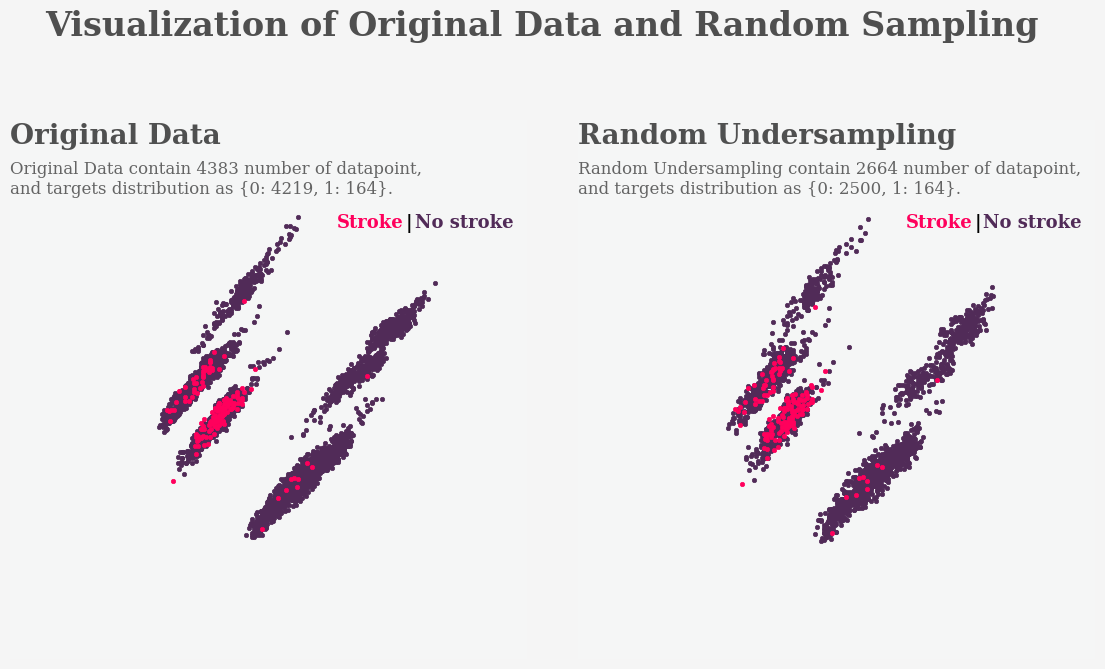

In [43]:
fig = plt.figure(figsize =(14,7))

gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

axes = [ax1, ax2]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')


random_state = 2024

# Original Data
sampling(X,y.ravel(),'Original Data',ax=ax1).visualize_data()



# Random undersampling
rus = RandomUnderSampler(random_state=random_state, sampling_strategy={0: 2500, 1: 164})
X_rs, y_rs = rus.fit_resample(X, y)
sampling(X_rs, y_rs, 'Random Undersampling', ax=ax2).visualize_data()

fig.text(0.15, 1, 'Visualization of Original Data and Random Sampling', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha=0.8)
plt.show()

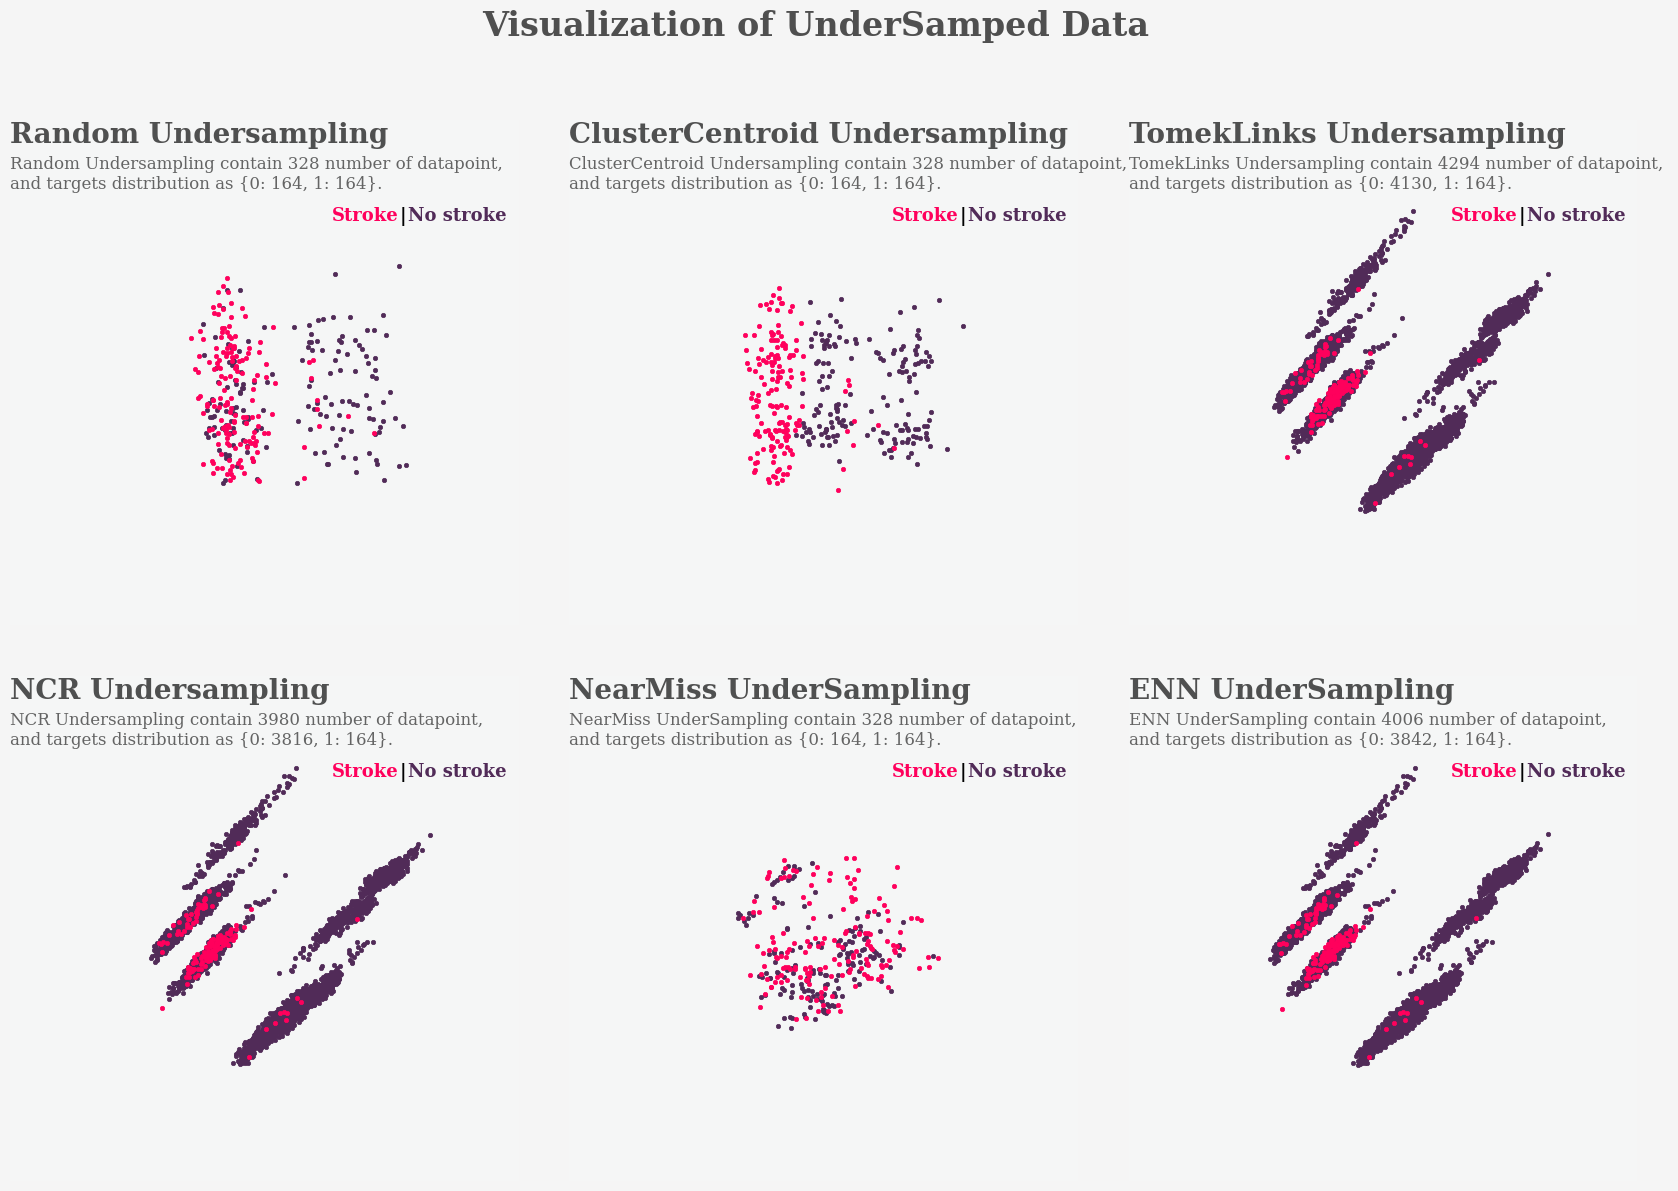

In [44]:
fig = plt.figure(figsize =(21,21))

gs = fig.add_gridspec(3,3)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])

ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])



axes = [ax1, ax2, ax3, ax4, ax5, ax6]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2024

# RandomUnderSampler
sampler = RandomUnderSampler(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'Random Undersampling',ax=ax1).visualize_data()


# ClusterCentroids
sampler = ClusterCentroids(random_state = random_state)
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ClusterCentroid Undersampling',ax=ax2).visualize_data()

# TomekLinks
sampler = TomekLinks()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'TomekLinks Undersampling',ax=ax3).visualize_data()


# NeighbourhoodCleaningRule
sampler = NeighbourhoodCleaningRule()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'NCR Undersampling',ax=ax4).visualize_data()


# NearMiss
sampler = NearMiss()
X_rs, y_rs = sampler.fit_resample(X,y.ravel())
sampling(X_rs,y_rs,'NearMiss UnderSampling',ax=ax5).visualize_data()



# EditedNearestNeighbours
sampler = EditedNearestNeighbours()
X_rs, y_rs = sampler.fit_resample(X, y)
sampling(X_rs,y_rs,'ENN UnderSampling',ax=ax6).visualize_data() 

fig.text(0.35,0.92,'Visualization of UnderSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()

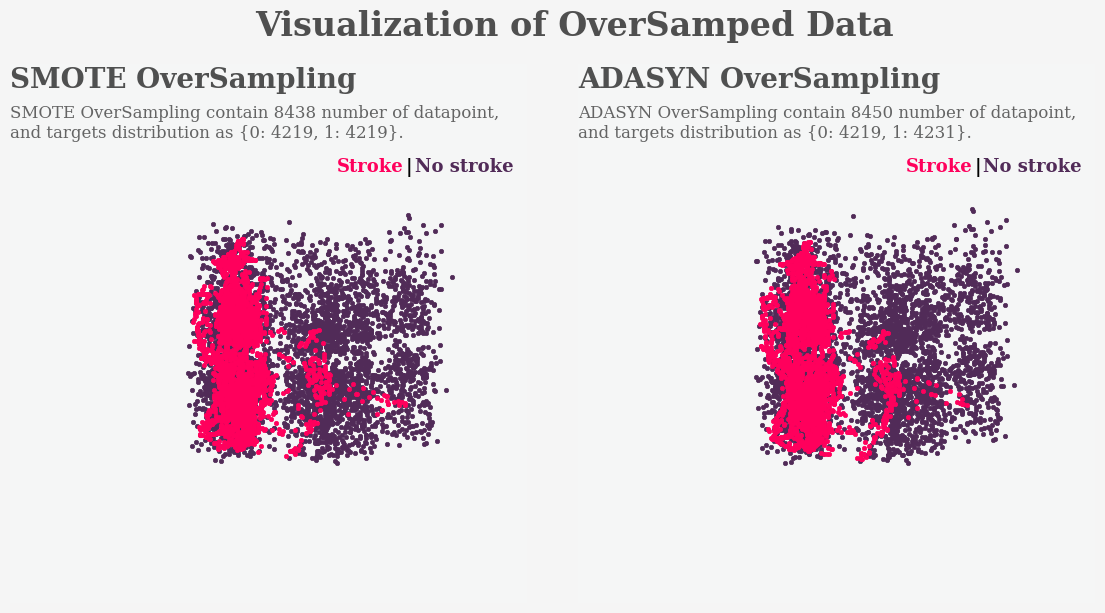

In [45]:
fig = plt.figure(figsize =(14,7))

gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.1, hspace = 0.1)

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])


axes = [ax1, ax2]

fig.patch.set_facecolor('#f5f5f5')

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f8f8f8')

        
random_state = 2024


# SMOTESampler
sampler = SMOTE()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'SMOTE OverSampling',ax=ax1).visualize_data() 


# ADASYNSampler
sampler = ADASYN()
X_rs, y_rs = sampler.fit_resample(X, y.ravel())
sampling(X_rs,y_rs,'ADASYN OverSampling',ax=ax2).visualize_data()

fig.text(0.3,0.92,'Visualization of OverSamped Data', {'font': 'serif', 'weight': 'bold', 'size': 24}, alpha = 0.8)
fig.show()

Choosing SMOTE oversampling data for modeling as the number of datapoints generated are in equal proportion from this technique.

### Modelling

In [46]:
# training and testing data split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, shuffle = True, random_state = 2024)

#smoteresampling 
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X_train, y_train.ravel())

print('Shape of Training features: {}'.format(X_resample.shape))
print('Shape of Training targets: {}'.format(y_resample.shape))
print('Shape of Testing features: {}'.format(X_test.shape))
print('Shape of Testing targets: {}'.format(y_test.shape))

Shape of Training features: (6318, 23)
Shape of Training targets: (6318,)
Shape of Testing features: (1096, 23)
Shape of Testing targets: (1096,)


In [47]:
# Null accuracy Score for current data
NUll_acc = round (max(y_test.mean(), 1 - y_test.mean()), 2)

print('Null Accuracy Score for Current Data is {}'.format(NUll_acc))

Null Accuracy Score for Current Data is 0.97


This mean any dump model could randomly predict targets nearly 95% accurate. With implementation of some kind of data sampling should do a better job compared to raw data.

In [48]:

def predictions(x_set, y_set):
    t1 = time.time()
    print('Classification Process Starts....')
    accuracy, precision, recall, f1, auc, conf_mat = [], [], [], [], [], []

    random_state = 2024

    ##classifiers list 
    classifiers = [
        SVC(random_state=random_state, probability=True),
        DecisionTreeClassifier(random_state=random_state),
        RandomForestClassifier(random_state=random_state),
        GradientBoostingClassifier(random_state=random_state),
        KNeighborsClassifier(),
        LogisticRegression(random_state=random_state)
    ]

    for classifier in classifiers:
        t = time.time()
        print('Fitting classifier with parameters: {}'.format(classifier))
        
        # Classifier and fitting
        clf = classifier
        clf.fit(x_set, y_set)
        
        # Predictions
        y_preds = clf.predict(X_test)
        y_probs = clf.predict_proba(X_test)
        
        # Metrics
        accuracy.append((round(accuracy_score(y_test, y_preds), 2)) * 100)
        precision.append((round(precision_score(y_test, y_preds), 2)) * 100)
        recall.append((round(recall_score(y_test, y_preds), 2)) * 100)
        f1.append((round(f1_score(y_test, y_preds), 2)) * 100)
        auc.append((round(roc_auc_score(y_test, y_probs[:, 1]), 2)) * 100)
        conf_mat.append(confusion_matrix(y_test, y_preds))
        
        elapsed = time.time() - t
        print('Done and elapsed time is {} seconds'.format(round(elapsed, 3)))
        print('\n')
    
    results_df = pd.DataFrame({
        "Accuracy Score": accuracy,
        "Precision Score": precision,
        "Recall Score": recall,
        "f1 Score": f1,
        "AUC Score": auc,
        "Confusion Matrix": conf_mat,
        "Algorithm": ["SVC", "DecisionTree", "RandomForest", "GradientBoosting", "KNeighbors", "LogisticRegression"]
    })
    
    results_df = results_df.sort_values(by='Algorithm', ascending=False).reset_index(drop=True)
    t2 = time.time() - t1
    print('\nClassification is completed and results are stored in dataframe.\nTotal time elapsed is {} seconds'.format(t2))
    print('***************************************************************\n\n')
    
    return results_df

In [49]:
orig_results = predictions(X_train,y_train)
resamp_results = predictions(X_resample,y_resample)

Classification Process Starts....
Fitting classifier with parameters: SVC(probability=True, random_state=2024)
Done and elapsed time is 0.674 seconds


Fitting classifier with parameters: DecisionTreeClassifier(random_state=2024)
Done and elapsed time is 0.019 seconds


Fitting classifier with parameters: RandomForestClassifier(random_state=2024)
Done and elapsed time is 0.251 seconds


Fitting classifier with parameters: GradientBoostingClassifier(random_state=2024)
Done and elapsed time is 0.501 seconds


Fitting classifier with parameters: KNeighborsClassifier()
Done and elapsed time is 0.042 seconds


Fitting classifier with parameters: LogisticRegression(random_state=2024)
Done and elapsed time is 0.022 seconds



Classification is completed and results are stored in dataframe.
Total time elapsed is 1.5104122161865234 seconds
***************************************************************


Classification Process Starts....
Fitting classifier with parameters: SVC(probability=True,

In [54]:
def multi_visualize(data, vmin=-0.5, vmax=1):
    fig = plt.figure(figsize=(24, 18))  # Increased figure height for better visibility
    gs = fig.add_gridspec(3, 6)  # Adjusted the grid specification
    
    # Adjust number of axes to match the number of classifiers times 2 (original and SMOTE)
    axes = [fig.add_subplot(gs[i // 6, i % 6]) for i in range(12)]
    
    fig.patch.set_facecolor('#f6f5f5')
    
    for ax in axes:
        ax.axes.get_yaxis().set_visible(False)
        ax.axes.get_xaxis().set_visible(False)
        ax.set_facecolor('#f6f5f5')

    colors_original = ['#512b58', '#fe346e']
    colors_smote = ['#2b515e', '#34fe4e']
    colormap_original = mcolors.LinearSegmentedColormap.from_list("", colors_original)
    colormap_smote = mcolors.LinearSegmentedColormap.from_list("", colors_smote)
    
    for i, res_df in enumerate(data):
        alg = res_df['Algorithm']
        cf = res_df['Confusion Matrix']
        auc = res_df['AUC Score']
        f1 = res_df['f1 Score']
        forig = data[0]['f1 Score']
        fresam = data[1]['f1 Score']
        
        for n in range(len(alg)):
            ax = axes[n + (i * len(alg))]
            cf_mat = cf[n]
            
            labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
            counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
            percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten() / np.sum(cf_mat)]
            label = (np.array([f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels, counts, percentages)])).reshape(2, 2)
            
            cmap = colormap_original if i == 0 else colormap_smote
            
            sns.heatmap(cf_mat, vmin=vmin, vmax=vmax, cmap=cmap, linewidths=2, linecolor='#f6f5f5',
                        ax=ax, annot=label, fmt='', cbar=False, annot_kws={'font': 'serif', 'size': 14, 'color': 'black', 'weight': 'bold'}, alpha=0.8)
            
            if i == 0:
                ax.text(0, -0.1, '{}'.format(alg[n]), {'font': 'serif', 'size': 16, 'color': 'black', 'weight': 'bold'})
            else:
                ax.text(0, -0.1, 'SMOTE {}'.format(alg[n]), {'font': 'serif', 'size': 16, 'color': 'black', 'weight': 'bold'})
            
            if (i == 1 and f1[n] > forig[n]) and (auc[n] > 75):
                ax.scatter(1, 1, s=3500, c='#34fe4e')
            elif (i == 0 and f1[n] > 5) and (auc[n] > 75):
                ax.scatter(1, 1, s=3500, c='#512b58', alpha=0.9)
            else:
                ax.scatter(1, 1, s=3500, c='white')
            
            ax.text(0.75, 1.1, 'F1: {}\nAUC: {}'.format(int(round(f1[n], 1)), int(round(auc[n], 1))),
                    {'font': 'serif', 'size': 14, 'color': 'black', 'weight': 'bold'})

    fig.suptitle('Visualization of Results with Original and Oversampled Data', fontsize=28, weight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

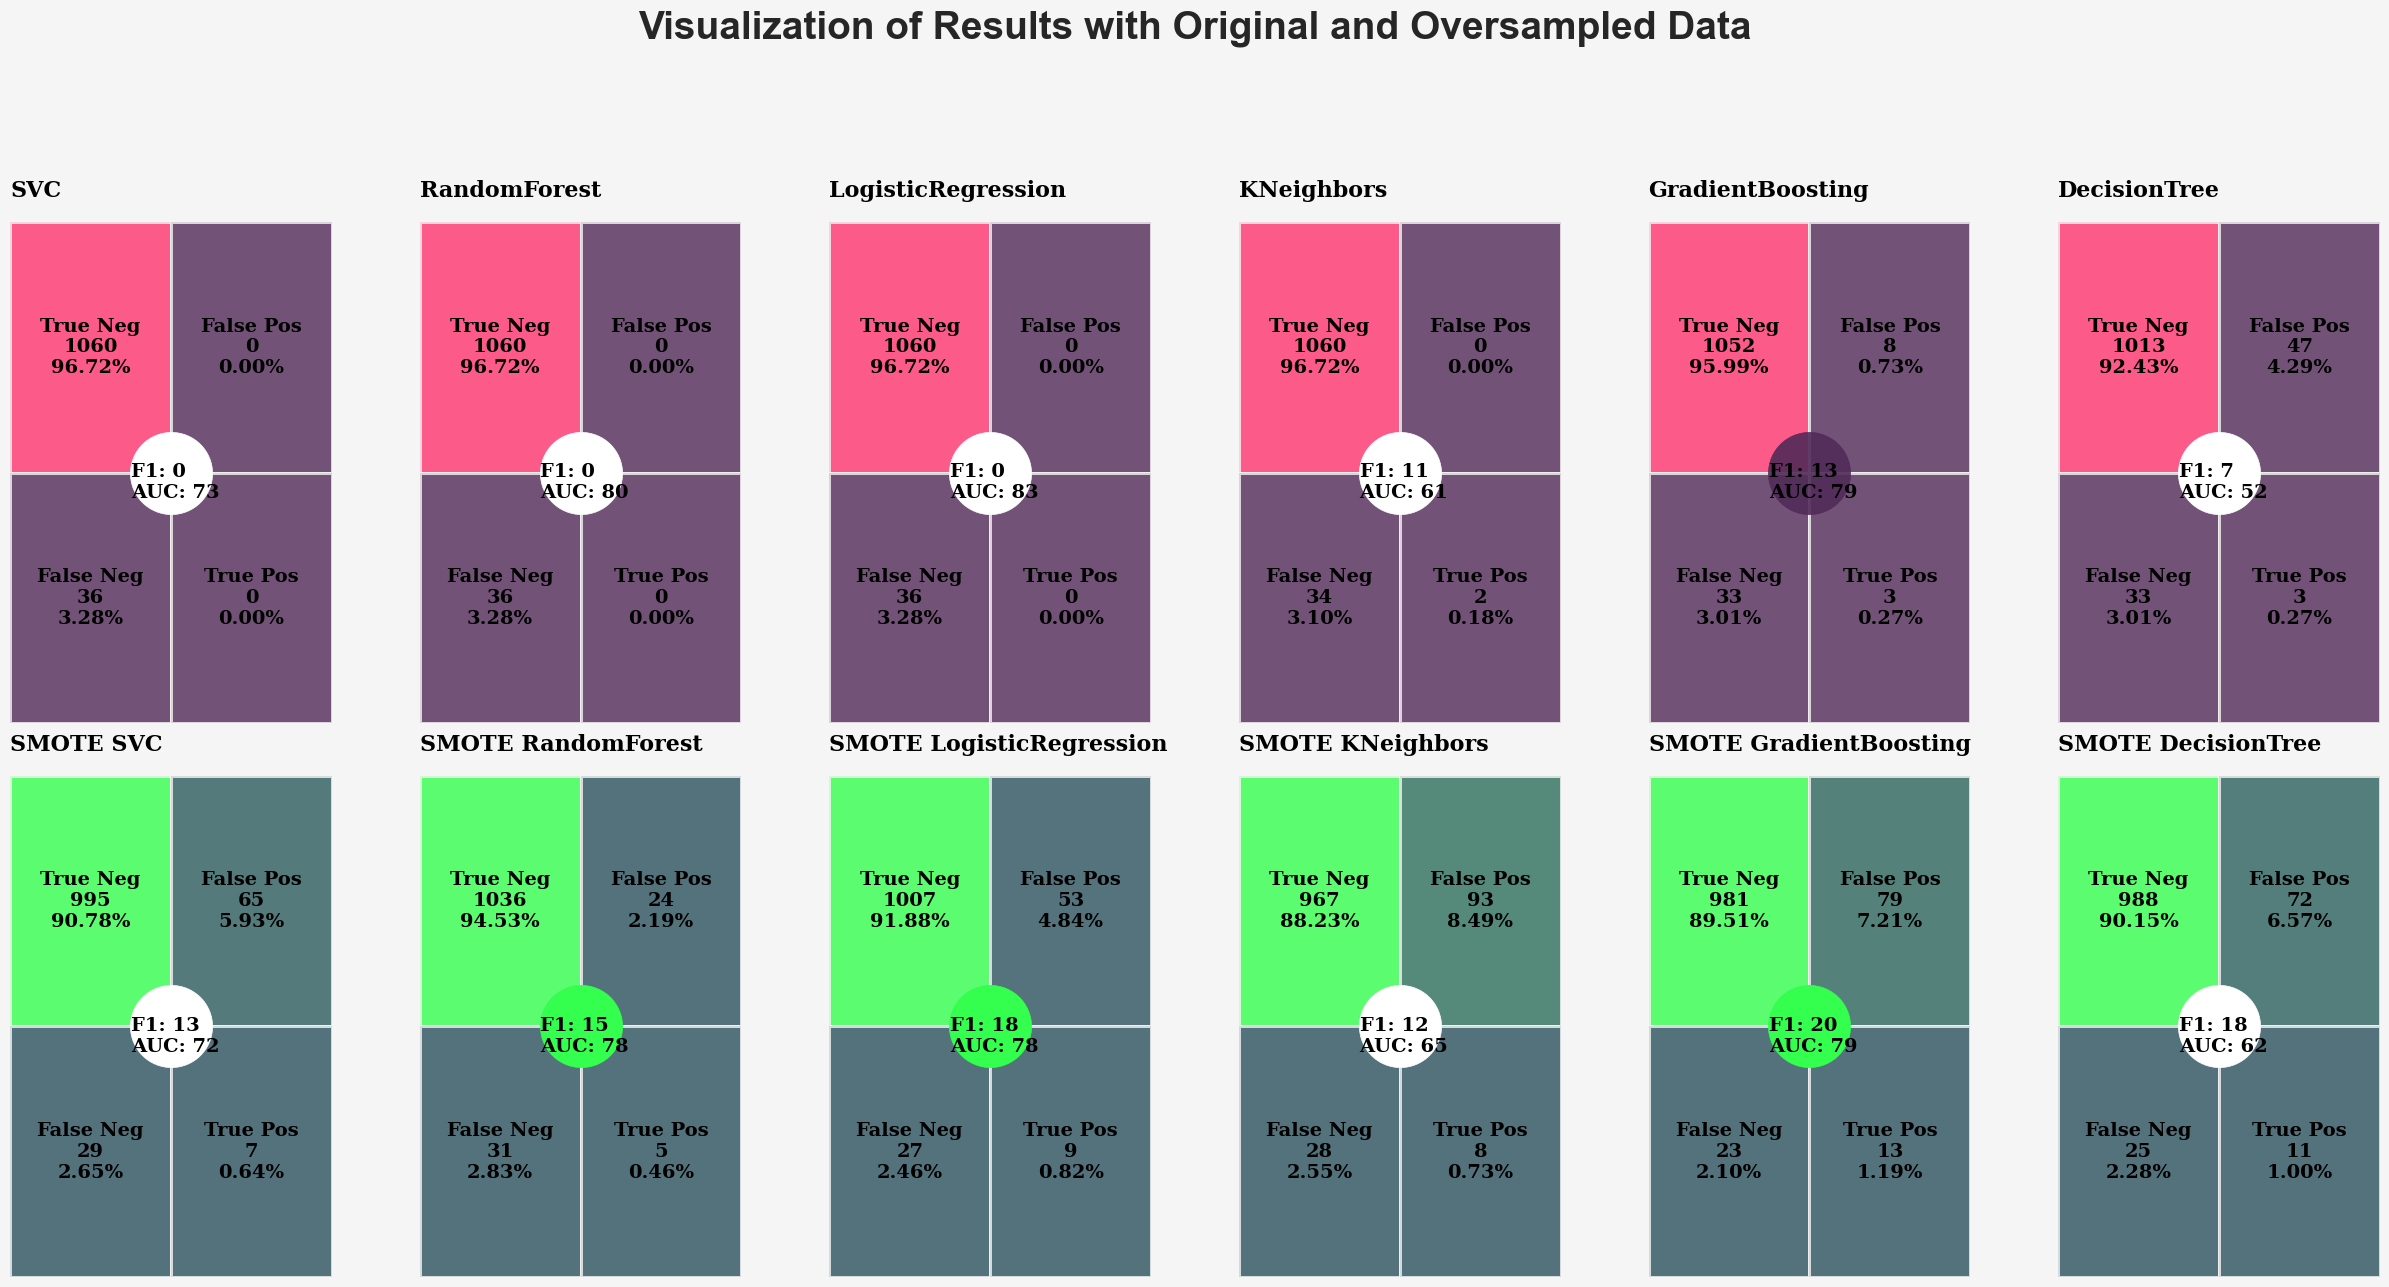

In [55]:
multi_visualize(data = [orig_results, resamp_results], vmin=50,vmax = 300)